# Virat Kohli - ODI Analysis

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder , OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from preprocessing import map_columns
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRFRegressor , XGBRegressor
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [2]:
import sklearn
print(sklearn.__version__)

1.7.2


### Importing Clean Data

In [3]:
# df = pd.read_excel('ViratKohli-ODI.xlsx')
df = pd.read_csv('./Data/Data-Regression.csv')

In [4]:
df.head()

,Match,Innings,Date,M/Inns,Posn,Versus,Ground,How Dismissed,Runs,B/F,S/R,Progressive-Runs,Progressive-B/F,Progressive-Avg,Progressive-S/R,Captain,Dismissal Type,City,State/Province,Country,ICC Region,Latitude,longitude,SENA
0,1,1.0,2008-08-18,1st,2,Sri Lanka,Rangiri Dambulla International Stadium,lbw b K M D N Kulasekara,12,22,54.55,12,22,12.00,54.55,No,LBW,Dambulla,Central Province,Sri Lanka,Asia,7.8600,80.6736,0
1,2,2.0,2008-08-20,2nd,2,Sri Lanka,Rangiri Dambulla International Stadium,c C K Kapugedera b T Thushara,37,67,55.22,49,89,24.50,55.06,No,Caught,Dambulla,Central Province,Sri Lanka,Asia,7.8600,80.6736,0
2,3,3.0,2008-08-24,1st,1,Sri Lanka,R Premadasa Stadium,run out,25,38,65.79,74,127,24.67,58.27,No,Run Out,Colombo,Western Province,Sri Lanka,Asia,6.9322,79.8726,0
3,4,4.0,2008-08-27,1st,1,Sri Lanka,R Premadasa Stadium,b T Thushara,54,66,81.82,128,193,32.00,66.32,No,Bowled,Colombo,Western Province,Sri Lanka,Asia,6.9322,79.8726,0
4,5,5.0,2008-08-29,2nd,1,Sri Lanka,R Premadasa Stadium,lbw b K M D N Kulasekara,31,46,67.39,159,239,31.80,66.53,No,LBW,Colombo,Western Province,Sri Lanka,Asia,6.9322,79.8726,0


### Data Description and Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Match             308 non-null    int64  
 1   Innings           296 non-null    float64
 2   Date              308 non-null    object 
 3   M/Inns            308 non-null    object 
 4   Posn              308 non-null    int64  
 5   Versus            308 non-null    object 
 6   Ground            308 non-null    object 
 7   How Dismissed     308 non-null    object 
 8   Runs              308 non-null    int64  
 9   B/F               308 non-null    int64  
 10  S/R               308 non-null    float64
 11  Progressive-Runs  308 non-null    int64  
 12  Progressive-B/F   308 non-null    int64  
 13  Progressive-Avg   308 non-null    float64
 14  Progressive-S/R   308 non-null    float64
 15  Captain           308 non-null    object 
 16  Dismissal Type    308 non-null    object 
 1

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Match,308.0,154.500000,89.056162,1.0000,77.7500,154.5000,231.2500,308.0000
Innings,296.0,148.500000,85.592056,1.0000,74.7500,148.5000,222.2500,296.0000
Posn,308.0,3.061688,0.909286,0.0000,3.0000,3.0000,3.0000,7.0000
Runs,308.0,47.262987,43.310924,0.0000,8.7500,34.0000,80.2500,183.0000
B/F,308.0,50.464286,39.894919,0.0000,13.0000,43.0000,83.0000,159.0000
S/R,308.0,77.269286,39.081306,0.0000,59.9050,80.9500,100.0000,209.0900
Progressive-Runs,308.0,6910.480519,4375.897862,12.0000,2997.2500,6473.0000,11105.0000,14557.0000
Progressive-B/F,308.0,7578.116883,4596.356583,22.0000,3581.7500,7195.0000,11923.5000,15543.0000
Progressive-Avg,308.0,52.078214,6.768001,12.0000,49.1650,52.1700,57.8175,60.3100
Progressive-S/R,308.0,87.948377,6.428469,54.5500,83.9075,89.9100,92.9300,93.8500


### Null Values

In [7]:
df.isnull().sum()

Match                0
Innings             12
Date                 0
M/Inns               0
Posn                 0
Versus               0
Ground               0
How Dismissed        0
Runs                 0
B/F                  0
S/R                  0
Progressive-Runs     0
Progressive-B/F      0
Progressive-Avg      0
Progressive-S/R      0
Captain              0
Dismissal Type       0
City                 0
State/Province      13
Country              0
ICC Region           0
Latitude             0
longitude            0
SENA                 0
dtype: int64

### Machine Learning

In [8]:
ml = df.copy()

In [9]:
ml.head()

,Match,Innings,Date,M/Inns,Posn,Versus,Ground,How Dismissed,Runs,B/F,S/R,Progressive-Runs,Progressive-B/F,Progressive-Avg,Progressive-S/R,Captain,Dismissal Type,City,State/Province,Country,ICC Region,Latitude,longitude,SENA
0,1,1.0,2008-08-18,1st,2,Sri Lanka,Rangiri Dambulla International Stadium,lbw b K M D N Kulasekara,12,22,54.55,12,22,12.00,54.55,No,LBW,Dambulla,Central Province,Sri Lanka,Asia,7.8600,80.6736,0
1,2,2.0,2008-08-20,2nd,2,Sri Lanka,Rangiri Dambulla International Stadium,c C K Kapugedera b T Thushara,37,67,55.22,49,89,24.50,55.06,No,Caught,Dambulla,Central Province,Sri Lanka,Asia,7.8600,80.6736,0
2,3,3.0,2008-08-24,1st,1,Sri Lanka,R Premadasa Stadium,run out,25,38,65.79,74,127,24.67,58.27,No,Run Out,Colombo,Western Province,Sri Lanka,Asia,6.9322,79.8726,0
3,4,4.0,2008-08-27,1st,1,Sri Lanka,R Premadasa Stadium,b T Thushara,54,66,81.82,128,193,32.00,66.32,No,Bowled,Colombo,Western Province,Sri Lanka,Asia,6.9322,79.8726,0
4,5,5.0,2008-08-29,2nd,1,Sri Lanka,R Premadasa Stadium,lbw b K M D N Kulasekara,31,46,67.39,159,239,31.80,66.53,No,LBW,Colombo,Western Province,Sri Lanka,Asia,6.9322,79.8726,0


In [11]:
ml = ml[['Date','M/Inns','Versus','Country','SENA','Captain','B/F','Runs']]

In [12]:
ml.head()

,Date,M/Inns,Versus,Country,SENA,Captain,B/F,Runs
0,2008-08-18,1st,Sri Lanka,Sri Lanka,0,No,22,12
1,2008-08-20,2nd,Sri Lanka,Sri Lanka,0,No,67,37
2,2008-08-24,1st,Sri Lanka,Sri Lanka,0,No,38,25
3,2008-08-27,1st,Sri Lanka,Sri Lanka,0,No,66,54
4,2008-08-29,2nd,Sri Lanka,Sri Lanka,0,No,46,31


### Preprocessing

### Using FunctionTransformer to transform the columns according to our logic

In [13]:
# def map_columns(ml):
#     df = ml.copy()
    
#     df['Date'] = pd.to_datetime(df['Date'])
#     df['Month'] = df['Date'].dt.month
#     df['Year'] = df['Date'].dt.year
#     df.drop('Date',inplace=True,axis=1)
    
#     df['M/Inns'] = df['M/Inns'].map({
#         '1st': 1,
#         '2nd': 2,
#         'N/A - No Result': 0
#     })
    
#     df['Captain'] = df['Captain'].map({
#         'Yes': 1,
#         'No': 0
#     })
    
#     return df

In [14]:
mapping_transformer = FunctionTransformer(func=map_columns,validate=False)

In [15]:
categorical_encoder = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)

In [16]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_encoder, ['Versus', 'Country']),
        ('num', 'passthrough', ['B/F', 'Month', 'Year', 'M/Inns', 'Captain', 'SENA'])
    ]
)

In [17]:
print(type(categorical_encoder))

<class 'sklearn.preprocessing._encoders.OrdinalEncoder'>


In [18]:
lr = LinearRegression()
kn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
ada = AdaBoostRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor()
xgbrf = XGBRFRegressor()
cb = CatBoostRegressor()
lgb = LGBMRegressor()

In [19]:
x = ml.drop('Runs',axis=1)
y = ml[['Runs']]

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.05,shuffle=False)

### Linear Regression

In [21]:
pipeline = Pipeline(steps=[
    ('mapping', mapping_transformer),
    ('preprocessing', preprocessor),
    ('model', LinearRegression())
])

pipeline.fit(xtrain,ytrain)
lr_preds = pipeline.predict(xtest)
lr_r2 = r2_score(ytest,lr_preds)
lr_mae = mean_absolute_error(ytest,lr_preds)
lr_mse = mean_squared_error(ytest,lr_preds)
lr_rmse = np.sqrt(lr_mse)

print('r2 Score: ',lr_r2)
print('MAE: ',lr_mae)
print('RMSE: ',lr_rmse)

r2 Score:  0.9454338678798009
MAE:  7.721948022611464
RMSE:  9.854549979595314


### KNN

In [22]:
pipeline = Pipeline(steps=[
    ('mapping', mapping_transformer),
    ('preprocessing', preprocessor),
    ('model', KNeighborsRegressor())
])

pipeline.fit(xtrain,ytrain)
kn_preds = pipeline.predict(xtest)
kn_r2 = r2_score(ytest,kn_preds)
kn_mae = mean_absolute_error(ytest,kn_preds)
kn_mse = mean_squared_error(ytest,kn_preds)
kn_rmse = np.sqrt(kn_mse)

print('r2 Score: ',kn_r2)
print('MAE: ',kn_mae)
print('RMSE: ',kn_rmse)

r2 Score:  0.9154864609191694
MAE:  8.7
RMSE:  12.264175471673585


### Decision Tree

In [23]:
pipeline = Pipeline(steps=[
    ('mapping', mapping_transformer),
    ('preprocessing', preprocessor),
    ('model', DecisionTreeRegressor())
])

pipeline.fit(xtrain,ytrain)
dt_preds = pipeline.predict(xtest)
dt_r2 = r2_score(ytest,dt_preds)
dt_mae = mean_absolute_error(ytest,dt_preds)
dt_mse = mean_squared_error(ytest,dt_preds)
dt_rmse = np.sqrt(dt_mse)

print('r2 Score: ',dt_r2)
print('MAE: ',dt_mae)
print('RMSE: ',dt_rmse)

r2 Score:  0.8855504853964052
MAE:  11.3125
RMSE:  14.271912976192084


### Random Forest

In [24]:
pipeline = Pipeline(steps=[
    ('mapping', mapping_transformer),
    ('preprocessing', preprocessor),
    ('model', RandomForestRegressor())
])

pipeline.fit(xtrain,ytrain)
rf_preds = pipeline.predict(xtest)
rf_r2 = r2_score(ytest,rf_preds)
rf_mae = mean_absolute_error(ytest,rf_preds)
rf_mse = mean_squared_error(ytest,rf_preds)
rf_rmse = np.sqrt(rf_mse)

print('r2 Score: ',rf_r2)
print('MAE: ',rf_mae)
print('RMSE: ',rf_rmse)

r2 Score:  0.9128878002313398
MAE:  8.2225
RMSE:  12.451300132917849


C:\Users\Sharan Kalyan\Anaconda3\envs\mons_py313\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


### Adaboost

In [25]:
pipeline = Pipeline(steps=[
    ('mapping', mapping_transformer),
    ('preprocessing', preprocessor),
    ('model', AdaBoostRegressor())
])

pipeline.fit(xtrain,ytrain)
ada_preds = pipeline.predict(xtest)
ada_r2 = r2_score(ytest,ada_preds)
ada_mae = mean_absolute_error(ytest,ada_preds)
ada_mse = mean_squared_error(ytest,ada_preds)
ada_rmse = np.sqrt(ada_mse)

print('r2 Score: ',ada_r2)
print('MAE: ',ada_mae)
print('RMSE: ',ada_rmse)

r2 Score:  0.9156053641552969
MAE:  9.3030416919525
RMSE:  12.255545118259485


C:\Users\Sharan Kalyan\Anaconda3\envs\mons_py313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Gradient Boosting

In [26]:
pipeline = Pipeline(steps=[
    ('mapping', mapping_transformer),
    ('preprocessing', preprocessor),
    ('model', GradientBoostingRegressor())
])

pipeline.fit(xtrain,ytrain)
gb_preds = pipeline.predict(xtest)
gb_r2 = r2_score(ytest,gb_preds)
gb_mae = mean_absolute_error(ytest,gb_preds)
gb_mse = mean_squared_error(ytest,gb_preds)
gb_rmse = np.sqrt(gb_mse)

print('r2 Score: ',gb_r2)
print('MAE: ',gb_mae)
print('RMSE: ',gb_rmse)

r2 Score:  0.8666926433812084
MAE:  9.220327070726034
RMSE:  15.40289198025936


C:\Users\Sharan Kalyan\Anaconda3\envs\mons_py313\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


###  LGBM

In [27]:
pipeline = Pipeline(steps=[
    ('mapping', mapping_transformer),
    ('preprocessing', preprocessor),
    ('model', LGBMRegressor())
])

pipeline.fit(xtrain,ytrain)
lgb_preds = pipeline.predict(xtest)
lgb_r2 = r2_score(ytest,lgb_preds)
lgb_mae = mean_absolute_error(ytest,lgb_preds)
lgb_mse = mean_squared_error(ytest,lgb_preds)
lgb_rmse = np.sqrt(lgb_mse)

print('r2 Score: ',lgb_r2)
print('MAE: ',lgb_mae)
print('RMSE: ',lgb_rmse)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 127
[LightGBM] [Info] Number of data points in the train set: 292, number of used features: 8
[LightGBM] [Info] Start training from score 47.424658
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

C:\Users\Sharan Kalyan\Anaconda3\envs\mons_py313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sharan Kalyan\Anaconda3\envs\mons_py313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


### Catboost

In [28]:
pipeline = Pipeline(steps=[
    ('mapping', mapping_transformer),
    ('preprocessing', preprocessor),
    ('model', CatBoostRegressor())
])

pipeline.fit(xtrain,ytrain)
cb_preds = pipeline.predict(xtest)
cb_r2 = r2_score(ytest,cb_preds)
cb_mae = mean_absolute_error(ytest,cb_preds)
cb_mse = mean_squared_error(ytest,cb_preds)
cb_rmse = np.sqrt(cb_mse)

print('r2 Score: ',cb_r2)
print('MAE: ',cb_mae)
print('RMSE: ',cb_rmse)

Learning rate set to 0.033706
0:	learn: 42.1875885	total: 128ms	remaining: 2m 7s
1:	learn: 41.2463174	total: 129ms	remaining: 1m 4s
2:	learn: 40.2968423	total: 130ms	remaining: 43.2s
3:	learn: 39.4188342	total: 131ms	remaining: 32.6s
4:	learn: 38.6568787	total: 132ms	remaining: 26.2s
5:	learn: 37.6467937	total: 133ms	remaining: 22s
6:	learn: 36.7307537	total: 134ms	remaining: 18.9s
7:	learn: 35.9410783	total: 134ms	remaining: 16.7s
8:	learn: 35.1431565	total: 135ms	remaining: 14.9s
9:	learn: 34.3644336	total: 136ms	remaining: 13.5s
10:	learn: 33.7069043	total: 137ms	remaining: 12.3s
11:	learn: 33.0099614	total: 138ms	remaining: 11.4s
12:	learn: 32.3066740	total: 139ms	remaining: 10.6s
13:	learn: 31.6689209	total: 140ms	remaining: 9.85s
14:	learn: 30.9634749	total: 141ms	remaining: 9.25s
15:	learn: 30.3280611	total: 142ms	remaining: 8.71s
16:	learn: 29.6205037	total: 143ms	remaining: 8.24s
17:	learn: 29.0770735	total: 143ms	remaining: 7.83s
18:	learn: 28.5166696	total: 144ms	remaining: 

459:	learn: 5.5484953	total: 376ms	remaining: 442ms
460:	learn: 5.5380034	total: 377ms	remaining: 441ms
461:	learn: 5.5206758	total: 378ms	remaining: 440ms
462:	learn: 5.5127101	total: 378ms	remaining: 438ms
463:	learn: 5.5044497	total: 379ms	remaining: 437ms
464:	learn: 5.4909255	total: 379ms	remaining: 436ms
465:	learn: 5.4799365	total: 380ms	remaining: 435ms
466:	learn: 5.4686836	total: 380ms	remaining: 434ms
467:	learn: 5.4563609	total: 381ms	remaining: 433ms
468:	learn: 5.4471507	total: 381ms	remaining: 432ms
469:	learn: 5.4373661	total: 382ms	remaining: 430ms
470:	learn: 5.4254594	total: 382ms	remaining: 429ms
471:	learn: 5.4185905	total: 383ms	remaining: 428ms
472:	learn: 5.4118534	total: 383ms	remaining: 427ms
473:	learn: 5.4058349	total: 384ms	remaining: 426ms
474:	learn: 5.4009481	total: 384ms	remaining: 425ms
475:	learn: 5.3971954	total: 385ms	remaining: 424ms
476:	learn: 5.3857104	total: 385ms	remaining: 422ms
477:	learn: 5.3742672	total: 386ms	remaining: 421ms
478:	learn: 

810:	learn: 3.2722593	total: 555ms	remaining: 129ms
811:	learn: 3.2686395	total: 555ms	remaining: 129ms
812:	learn: 3.2640737	total: 556ms	remaining: 128ms
813:	learn: 3.2586558	total: 557ms	remaining: 127ms
814:	learn: 3.2555362	total: 557ms	remaining: 126ms
815:	learn: 3.2523578	total: 558ms	remaining: 126ms
816:	learn: 3.2495071	total: 559ms	remaining: 125ms
817:	learn: 3.2472511	total: 559ms	remaining: 124ms
818:	learn: 3.2418460	total: 560ms	remaining: 124ms
819:	learn: 3.2379881	total: 560ms	remaining: 123ms
820:	learn: 3.2362825	total: 561ms	remaining: 122ms
821:	learn: 3.2331797	total: 561ms	remaining: 122ms
822:	learn: 3.2282482	total: 562ms	remaining: 121ms
823:	learn: 3.2261304	total: 562ms	remaining: 120ms
824:	learn: 3.2237561	total: 563ms	remaining: 119ms
825:	learn: 3.2215639	total: 563ms	remaining: 119ms
826:	learn: 3.2194255	total: 564ms	remaining: 118ms
827:	learn: 3.2132568	total: 572ms	remaining: 119ms
828:	learn: 3.2093272	total: 573ms	remaining: 118ms
829:	learn: 

### Predictions

In [29]:
lrpreds = []
for i in lr_preds:
    lrpreds.append(np.absolute(int(i[0])))

In [30]:
ytest['Preds'] = lrpreds

In [31]:
ytest['Preds'] = ytest['Preds'].astype('int64')

In [32]:
ytest['Difference'] = ytest['Preds'] - ytest['Runs']

### Post Processing

In [33]:
xtest['Actual Score'] = ytest['Runs']
xtest['Predicted Score'] = ytest['Preds']
xtest['Prediction Error'] = ytest['Difference']

In [34]:
xtest['Match Info'] = "Against " + xtest['Versus'] + " at " + xtest['Country'] 

In [35]:
xtest = xtest[['Match Info','Date','B/F','Actual Score','Predicted Score','Prediction Error']]

### Results

In [36]:
xtest

,Match Info,Date,B/F,Actual Score,Predicted Score,Prediction Error
292,Against Sri Lanka at Sri Lanka,2024-08-02,32,24,30,6
293,Against Sri Lanka at Sri Lanka,2024-08-04,19,14,17,3
294,Against Sri Lanka at Sri Lanka,2024-08-07,18,20,16,-4
295,Against England at India,2025-02-09,8,5,6,1
296,Against England at India,2025-02-12,55,52,55,3
297,Against Bangladesh at UAE,2025-02-20,38,22,39,17
298,Against Pakistan at UAE,2025-02-23,111,100,114,14
299,Against New Zealand at UAE,2025-03-02,14,11,14,3
300,Against Australia at UAE,2025-03-04,98,84,101,17
301,Against New Zealand at UAE,2025-03-09,2,1,1,0


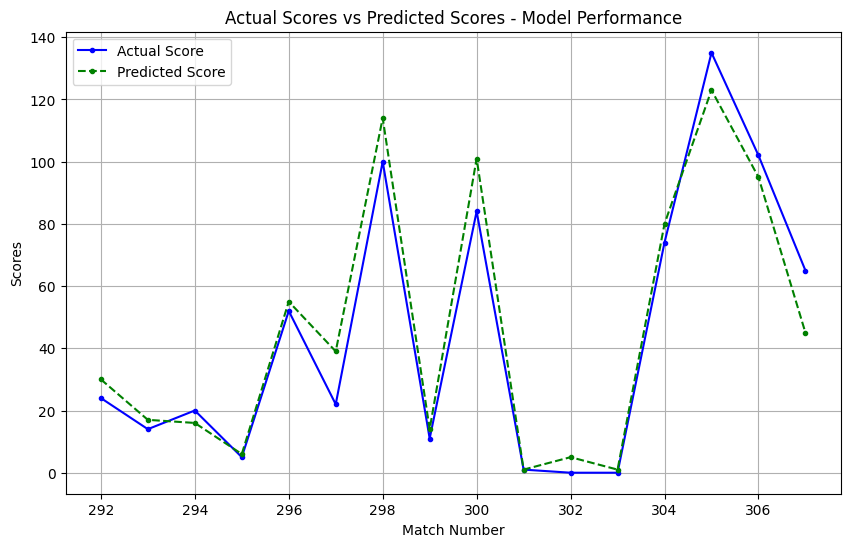

In [37]:
# Matplotlib

print('\n\n')
plt.figure(figsize=(10,6))
plt.plot(xtest.index.to_numpy(), xtest['Actual Score'].to_numpy(), color = 'blue',marker = '.', label = 'Actual Score')
plt.plot(xtest.index.to_numpy(), xtest['Predicted Score'].to_numpy() , color = 'green', marker = '.' ,linestyle = '--', label = 'Predicted Score')
plt.legend()
plt.title('Actual Scores vs Predicted Scores - Model Performance')
plt.xlabel('Match Number')
plt.ylabel('Scores')
plt.grid()
plt.show()

In [38]:


# ## Plotly
# import plotly.graph_objects as go

# fig = go.Figure()

# fig.add_trace(
#     go.Scatter(
#         x=xtest.index,
#         y=xtest['Actual Score'],
#         mode='lines+markers',
#         name='Actual Score',
#         marker=dict(symbol='circle'),
#         line=dict(width=2)
#     )
# )

# fig.add_trace(
#     go.Scatter(
#         x=xtest.index,
#         y=xtest['Predicted Score'],
#         mode='lines+markers',
#         name='Predicted Score',
#         marker=dict(symbol='circle'),
#         line=dict(width=2)
#     )
# )

# fig.update_layout(
#     title='Actual Scores vs Predicted Scores - Model Performance',
#     xaxis_title='Match Number',
#     yaxis_title='Scores',
#     width=1000,
#     height=600,
#     template='plotly_white',
#     legend=dict(x=0.01, y=0.99)
# )

# fig.show()


In [39]:
print('r2 Score: ',round(lr_r2,2))
print('MAE: ',round(lr_mae,2))
print('RMSE: ',round(lr_rmse,2))

r2 Score:  0.95
MAE:  7.72
RMSE:  9.85


### Let's now train our model on the entire data and save it

In [40]:
final_pipeline = Pipeline(steps=[
    ('mapping', mapping_transformer),
    ('preprocessing', preprocessor),
    ('model', LinearRegression())
])

final_pipeline.fit(x,y)

,steps,"[('mapping', ...), ('preprocessing', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,func,<function map...0021F4B065D00>
,inverse_func,None
,validate,False
,accept_sparse,False
,check_inverse,True
,feature_names_out,None
,kw_args,None


In [41]:
print("=== PIPELINE STEPS ===")
for name, step in final_pipeline.steps:
    print(name, "->", type(step), step)

=== PIPELINE STEPS ===
mapping -> <class 'sklearn.preprocessing._function_transformer.FunctionTransformer'> FunctionTransformer(func=<function map_columns at 0x0000021F4B065D00>)
preprocessing -> <class 'sklearn.compose._column_transformer.ColumnTransformer'> ColumnTransformer(transformers=[('cat',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['Versus', 'Country']),
                                ('num', 'passthrough',
                                 ['B/F', 'Month', 'Year', 'M/Inns', 'Captain',
                                  'SENA'])])
model -> <class 'sklearn.linear_model._base.LinearRegression'> LinearRegression()


In [42]:
import joblib
joblib.dump(final_pipeline, "final_pipeline.pkl")

['final_pipeline.pkl']

### Model saved as pkl file

In [43]:
testdata = pd.read_csv('./Data/NZL_ODI_testdata.csv')

In [44]:
testdata

,Date,M/Inns,Versus,Country,SENA,Captain,B/F
0,01-11-2025,1st,New Zealand,India,0,No,22
1,01-14-2025,1st,New Zealand,India,0,No,114
2,01-18-2025,2nd,New Zealand,India,0,No,77


In [47]:
prod_pipeline = joblib.load("final_pipeline.pkl")

In [48]:
final_predictions = np.absolute(prod_pipeline.predict(testdata))

In [49]:
testdata['Predicted Score'] = final_predictions.astype('int64')

In [50]:
testdata.index = [308,309,310]

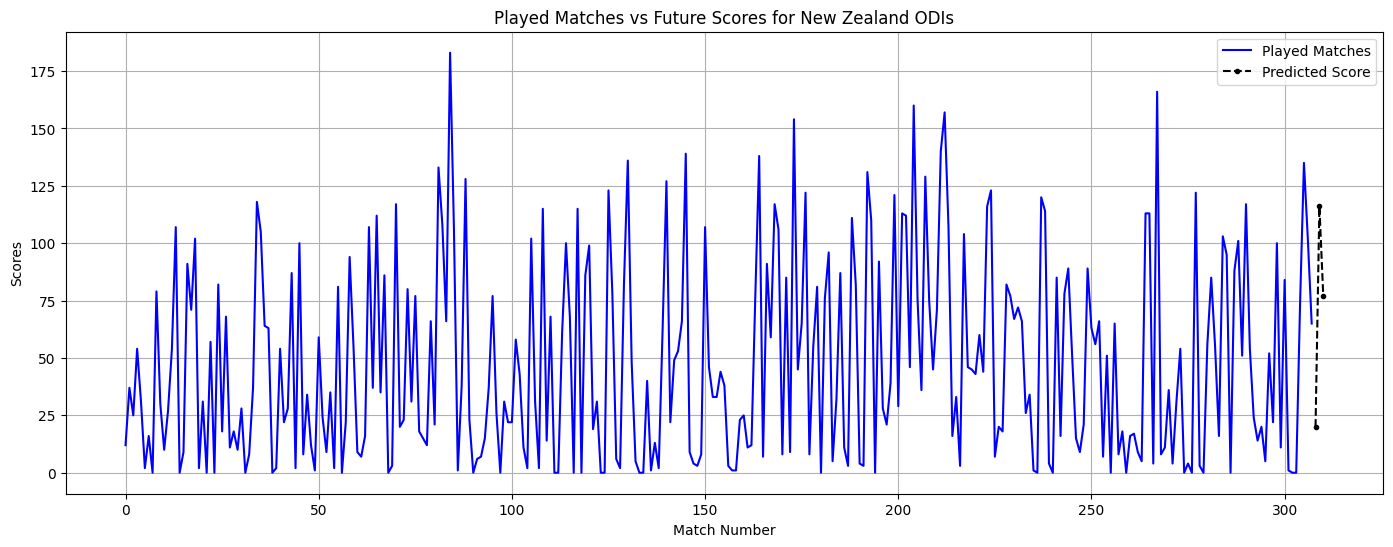

In [51]:

print('\n\n')
plt.figure(figsize=(17,6))
plt.plot(x.index.to_numpy() , y['Runs'].to_numpy(),label = 'Played Matches',color='blue')
plt.plot(testdata.index.to_numpy(), testdata['Predicted Score'].to_numpy() , color = 'k', marker = '.' ,linestyle = '--', label = 'Predicted Score')
plt.legend()
plt.title('Played Matches vs Future Scores for New Zealand ODIs')
plt.xlabel('Match Number')
plt.ylabel('Scores')
plt.grid()
plt.show() 